# Parte I: Familiarizandonos con la base EPH y limpieza
La Encuesta Permanente de Hogares (EPH) es un programa nacional de
producción sistemática y permanente de indicadores sociales que lleva a cabo
el Instituto Nacional de Estadística y Censos (INDEC), que permite conocer
las características sociodemográficas y socioeconómicas de la población. Uno
de los indicadores más valiosos sobre el mercado laboral que pueden
obtenerse con los datos de esta encuesta es la tasa de desocupación.
1. Utilizando información disponible en la página del INDEC, expliquen
brevemente cómo se identifica a las personas desocupadas.




# Respuesta:
El INDEC encuentra a las personas desocupadas mediante un censo donde se le pregunta a la gente sobre su situación laboral. Para el INDEC una persona esta en estado de desocupación si no realizo ninguna actividad laboral por lo menos una semana anterior a la encuesta y que también este en condiciones de trabajar.
Este censo que controla la desocupación entre muchos otros datos se llama Encuesta Permanente de Hogares EPH. La EPH tiene códigos para definir estas variables, por ejemplo para saber si esta desocupado, con trabajo, inactivo o si es menor de 10 años se usa el código ESTADO.
El código CAT_INAC sirve para identificar aquellos que están inactivos como los jubilados, estudiantes y discapacitados.
Otro código interesante son los diferentes que hay para describir como estuvo buscando esa persona trabajo, por ejemplo PP02C1 si estuvo haciendo entrevistas, PP02C3 si se presento en algún lugar etc.

2. Entren a la página https://www.indec.gob.ar/ y vayan a la sección
Servicios y Herramientas  Bases de datos. Descarguen la base de
microdatos de la Encuesta Permanente de Hogares (EPH)
correspondiente al primer trimestre de 2004 y 2024 en formato .dta y
.xls, respectivamente (una vez descargadas, las bases a usar deberán
llamarse usu_individual_T104.dta y
usu_individual_T124.xls). En la página web, también encontrará
un diccionario de variables con el nombre de “Diseño de registro y
estructura para las bases preliminares (hogares y personas)”.
Descarguen el diccionario de cada año. En estos archivos se les indica
qué significa cada variable que aparece en la base de datos, en
particular, en la sección de Diseño de registros de la base Personas.




In [59]:
import pandas as pd
import numpy as np
import os
import random
#Importo matplotlib.pyplot
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows", 5)

In [60]:
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_T124.xlsx"
df = pd.read_excel(url)
df.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


In [61]:
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_t104.dta"
df2 = pd.read_stata(url)
df2

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


a. A partir de ahora, cada grupo debe decidir trabajar con una
región del país en específico (ver variable REGION). Eliminen los
datos de todas aquellas regiones que no se encuentren dentro de
su región y unan ambos trimestres (2004 y 2024) en una sola
base.

In [62]:
df2[df2["region"]=='Patagónica'].head(5)

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
42025,125122,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,150.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000
42026,125969,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
42027,125969,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
42028,126757,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,06,06,05,,07,04,0.0,0.0,0.0,00000
42029,126757,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,06,06,05,,07,04,0.0,0.0,0.0,00000


In [63]:
df3 = df[df["REGION"]==42]
df3
df4 = df2[df2["region"]=="Patagónica"]
df4.columns = df4.columns.str.upper()
df4
df_completo = pd.concat([df3,df4],axis=0)
df_completo

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024.0,1,1.0,3,1,42,S,10,439.0,...,12.0,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024.0,1,1.0,4,1,42,S,10,439.0,...,12.0,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024.0,1,1.0,5,0,42,S,10,439.0,...,12.0,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024.0,1,1.0,1,1,42,S,10,675.0,...,6.0,6,6.0,NaN,6,1610.0,NaN,NaN,NaN,NaN
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024.0,1,1.0,2,1,42,S,10,675.0,...,6.0,6,6.0,NaN,6,1610.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,2004.0,1er. Trimestre,1.0,1.0,Sí,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,08,,09,07,NaN,0.0,0.0,0.0,00000
45285,285733,2004.0,1er. Trimestre,1.0,2.0,Sí,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,08,,09,07,NaN,0.0,0.0,0.0,00000
45286,285733,2004.0,1er. Trimestre,1.0,3.0,Sí,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,08,,09,07,NaN,0.0,0.0,0.0,00000
45287,285733,2004.0,1er. Trimestre,1.0,4.0,0.0,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,08,,09,07,NaN,0.0,0.0,0.0,00000


b. Asegúrense de que todas las variables tengan el formato
correcto. Selecciones 15 variables de interés y reporten la
cantidad de valores faltantes (NA, o NaN en Python) en una
tabla por cada año. Comenten qué variables de las 15 que
seleccionarion tienen más valores faltantes y qué año.

In [64]:
columnas = df_completo.columns.to_list()
for i, item in enumerate(columnas, start=0):
    print(i,item)

0 CODUSU
1 ANO4
2 TRIMESTRE
3 NRO_HOGAR
4 COMPONENTE
5 H15
6 REGION
7 MAS_500
8 AGLOMERADO
9 PONDERA
10 CH03
11 CH04
12 CH05
13 CH06
14 CH07
15 CH08
16 CH09
17 CH10
18 CH11
19 CH12
20 CH13
21 CH14
22 CH15
23 CH15_COD
24 CH16
25 CH16_COD
26 NIVEL_ED
27 ESTADO
28 CAT_OCUP
29 CAT_INAC
30 IMPUTA
31 PP02C1
32 PP02C2
33 PP02C3
34 PP02C4
35 PP02C5
36 PP02C6
37 PP02C7
38 PP02C8
39 PP02E
40 PP02H
41 PP02I
42 PP03C
43 PP03D
44 PP3E_TOT
45 PP3F_TOT
46 PP03G
47 PP03H
48 PP03I
49 PP03J
50 INTENSI
51 PP04A
52 PP04B_COD
53 PP04B1
54 PP04B2
55 PP04B3_MES
56 PP04B3_ANO
57 PP04B3_DIA
58 PP04C
59 PP04C99
60 PP04D_COD
61 PP04G
62 PP05B2_MES
63 PP05B2_ANO
64 PP05B2_DIA
65 PP05C_1
66 PP05C_2
67 PP05C_3
68 PP05E
69 PP05F
70 PP05H
71 PP06A
72 PP06C
73 PP06D
74 PP06E
75 PP06H
76 PP07A
77 PP07C
78 PP07D
79 PP07E
80 PP07F1
81 PP07F2
82 PP07F3
83 PP07F4
84 PP07F5
85 PP07G1
86 PP07G2
87 PP07G3
88 PP07G4
89 PP07G_59
90 PP07H
91 PP07I
92 PP07J
93 PP07K
94 PP08D1
95 PP08D4
96 PP08F1
97 PP08F2
98 PP08J1
99 PP08J2
100 

In [65]:
df_completo.columns.to_list()

['CODUSU',
 'ANO4',
 'TRIMESTRE',
 'NRO_HOGAR',
 'COMPONENTE',
 'H15',
 'REGION',
 'MAS_500',
 'AGLOMERADO',
 'PONDERA',
 'CH03',
 'CH04',
 'CH05',
 'CH06',
 'CH07',
 'CH08',
 'CH09',
 'CH10',
 'CH11',
 'CH12',
 'CH13',
 'CH14',
 'CH15',
 'CH15_COD',
 'CH16',
 'CH16_COD',
 'NIVEL_ED',
 'ESTADO',
 'CAT_OCUP',
 'CAT_INAC',
 'IMPUTA',
 'PP02C1',
 'PP02C2',
 'PP02C3',
 'PP02C4',
 'PP02C5',
 'PP02C6',
 'PP02C7',
 'PP02C8',
 'PP02E',
 'PP02H',
 'PP02I',
 'PP03C',
 'PP03D',
 'PP3E_TOT',
 'PP3F_TOT',
 'PP03G',
 'PP03H',
 'PP03I',
 'PP03J',
 'INTENSI',
 'PP04A',
 'PP04B_COD',
 'PP04B1',
 'PP04B2',
 'PP04B3_MES',
 'PP04B3_ANO',
 'PP04B3_DIA',
 'PP04C',
 'PP04C99',
 'PP04D_COD',
 'PP04G',
 'PP05B2_MES',
 'PP05B2_ANO',
 'PP05B2_DIA',
 'PP05C_1',
 'PP05C_2',
 'PP05C_3',
 'PP05E',
 'PP05F',
 'PP05H',
 'PP06A',
 'PP06C',
 'PP06D',
 'PP06E',
 'PP06H',
 'PP07A',
 'PP07C',
 'PP07D',
 'PP07E',
 'PP07F1',
 'PP07F2',
 'PP07F3',
 'PP07F4',
 'PP07F5',
 'PP07G1',
 'PP07G2',
 'PP07G3',
 'PP07G4',
 'PP07G_59',


elegimos tanto, tanto y tanto porque tanto y tanto.

In [66]:
df_completo.shape

(7777, 181)

In [67]:
columnas_a_usar = [1,10,11,13,14,15,16,17,18,19,20,22,24,26,27,29,169]

In [68]:
#filtramos las columnas que queremos en un nuevo dataset
df_filtrado = df_completo.iloc[0:4513, columnas_a_usar]
df_filtrado

,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,IPCF
0,2024.0,3,2,44,5,1,1,2,0,4,2,1,1,3,1,0,0.0
1,2024.0,5,2,22,5,1,1,2,0,7,2,1,1,5,3,4,0.0
2,2024.0,5,2,3,5,1,2,1,1,1,2,1,6,7,4,5,0.0
3,2024.0,1,1,54,2,1,1,2,0,4,1,1,1,4,1,0,212500.0
4,2024.0,2,2,53,2,4,1,2,0,4,1,1,1,4,1,0,212500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45869,2024.0,1,1,32,5,1,1,2,0,7,2,1,1,5,1,0,0.0
45932,2024.0,1,2,34,5,4,1,2,0,4,2,1,1,3,1,0,62500.0
45933,2024.0,3,1,10,5,4,1,1,1,2,2,1,1,1,3,3,62500.0
45934,2024.0,3,2,8,5,4,1,1,1,2,2,1,1,1,4,3,62500.0


In [69]:
tot_Nan = df_filtrado.isnull().shape[0]
print("SUM_2024:", tot_Nan)

SUM_2024: 4513


In [70]:
df8 = df_completo.iloc[:,columnas_a_usar]
df8.head(5)

df8["CH03"] = df8["CH03"].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':8, 'Otros familiares':9, 'No familiares':10})
df8["CH04"] = df8["CH04"].replace({'Varón':1, 'Mujer':2})
df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
df8["CH07"] = df8["CH07"].replace({'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5})
df8["CH08"] = df8["CH08"].replace({ 'Obra social (incluye PAMI)':1,  "Mutual /Prepaga /Servicio de emergencia":2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns/Nr':9, 'Obra social y mutual/prepaga/servicio de emergencia':12, "Obra social y planes y seguros públicos":13, "Mutual/Prepaga/Servicio de emergencia":23, "Obra social, mutual /prepaga /servicio de emergencia y planes y seguros públicos":123})
df8["NIVEL_ED"] = df8['NIVEL_ED'].replace({
    'Sin instrucción': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    "Secundaria incompleta": 3,
    'Secundaria completa': 4,
    'Superior incompleto': 5,
    'Superior completo': 6
})
df8['ESTADO'] = df8['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3
})
df8['CAT_INAC'] = df8['CAT_INAC'].replace({
    'Jubilado/a o pensionado/a': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Quehaceres del hogar': 4,
    'Otra condición': 5})
df8['IPCF'] = df8['IPCF'].apply(lambda x: None if x < 0 else x)
df8["CH12"] = df8["CH12"].replace({"Jardín/Preescolar":1, "Primario":2, "EGB":3, "Secundario":4, "Polimodal":5, "Terciario":6, "Universitario":7, "Posgrado Universitario":8, "Educación especial (discapacitado)":9})
df8["CH13"] = df8["CH13"].replace({"Sí":1, "No":2, "Ns./Nr.":3})
df8["CH15"] = df8["CH15"].replace({"En esta localidad":1, "En otra localidad":2, "En otra provincia (especificar)":3, "En un país limítrofe":4, "En otro país":5, "Ns./Nr.":9})
df8["CH16"] = df8["CH16"].replace({"En esta localidad":1, "En otra localidad de esta provincia":2, "En otra provincia (especificar)":3, "En un país limítrofe":4, "En otro país":5, "No había nacido":6, "Ns./Nr.":9})
df8.head(5)
#consejo: pasar 2004 de texto anumero

<ipython-input-70-898a608634cb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8["CH03"] = df8["CH03"].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':8, 'Otros familiares':9, 'No familiares':10})
<ipython-input-70-898a608634cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8["CH03"] = df8["CH03"].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':8, 'Otros fami

,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,IPCF
0,2024.0,3,2,44.0,5,1,1,2,0,4.0,2.0,1,1,3,1,0,0.0
1,2024.0,5,2,22.0,5,1,1,2,0,7.0,2.0,1,1,5,3,4,0.0
2,2024.0,5,2,3.0,5,1,2,1,1,1.0,2.0,1,6,7,4,5,0.0
3,2024.0,1,1,54.0,2,1,1,2,0,4.0,1.0,1,1,4,1,0,212500.0
4,2024.0,2,2,53.0,2,4,1,2,0,4.0,1.0,1,1,4,1,0,212500.0


In [71]:
df8['CH03'].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':8, 'Otros familiares':9, 'No familiares':10})

,CH03
0,3
1,5
2,5
3,1
4,2
...,...
45284,1
45285,2
45286,3
45287,3


In [72]:
df8 = df_completo.iloc[columnas_a_usar]
df9 = df8.isna().sum()
tot_Nan = df8.isnull().sum().sum()
print(df9)
print("SUM_2004:", tot_Nan)

CODUSU         0
ANO4           0
TRIMESTRE      0
NRO_HOGAR      0
COMPONENTE     0
              ..
PONDIH         0
PJ1_1         17
PJ2_1         17
PJ3_1         17
IDIMPP        17
Length: 181, dtype: int64
SUM_2004: 1287


c. Si notan valores sin sentido (como ingresos negativos) corriganla
de acuerdo a la documentación de la EPH (puede ser una
codificación de no respuesta de los individuos) y eliminen estos
valores extraños de sus 15 variables de interes. Comenten
brevemente en el reporte dicho proceso de limpieza.

In [73]:
df8 = df_completo.iloc[columnas_a_usar]
df10 = df8["CH03"] = df8["CH03"].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':8, 'Otros familiares':9, 'No familiares':10})
df10 = df8["CH04"] = df8["CH04"].replace({'Varón':1, 'Mujer':2})
df10 = df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
df10 = df8["CH07"] = df8["CH07"].replace({'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5})
df10 = df8["CH08"] = df8["CH08"].replace({ 'Obra social (incluye PAMI)':1,  "Mutual /Prepaga /Servicio de emergencia":2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns/Nr':9, 'Obra social y mutual/prepaga/servicio de emergencia':12, "Obra social y planes y seguros públicos":13, "Mutual/Prepaga/Servicio de emergencia":23, "Obra social, mutual /prepaga /servicio de emergencia y planes y seguros públicos":123})
df10 = df8["NIVEL_ED"] = df8['NIVEL_ED'].replace({
    'Sin instrucción': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    "Secundaria incompleta": 3,
    'Secundaria completa': 4,
    'Superior incompleto': 5,
    'Superior completo': 6
})
df10= df8['ESTADO'] = df8['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3
})
df10=df8['CAT_INAC'] = df8['CAT_INAC'].replace({
    'Jubilado/a o pensionado/a': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Quehaceres del hogar': 4,
    'Otra condición': 5})
df10=df8['IPCF'] = df8['IPCF'].apply(lambda x: None if x < 0 else x)
df10 = df8["CH13"] = df8["CH13"].replace({"Sí":1, "No":2, "Ns./Nr.":3})
df10 = df8["CH15"] = df8["CH15"].replace({"En esta localidad":1, "En otra localidad":2, "En otra provincia (especificar)":3, "En un país limítrofe":4, "En otro país":5, "Ns./Nr.":9})
df10 = df8["CH16"] = df8["CH16"].replace({"En esta localidad":1, "En otra localidad de esta provincia":2, "En otra provincia (especificar)":3, "En un país limítrofe":4, "En otro país":5, "No había nacido":6, "Ns./Nr.":9})
ultimo_df = pd.concat([df_filtrado,df8],axis=0)
ultimo_df = ultimo_df.replace("NaN", 0)
ultimo_df = ultimo_df.replace([np.nan, -np.inf], 0)
ultimo_df = ultimo_df.apply(pd.to_numeric, errors='coerce').fillna(0)
ultimo_df[ultimo_df <= 0] = 0
ultimo_df


<ipython-input-73-2c87cb2f3253>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df10 = df8["CH03"] = df8["CH03"].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':8, 'Otros familiares':9, 'No familiares':10})
<ipython-input-73-2c87cb2f3253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10 = df8["CH03"] = df8["CH03"].replace({'Jefe':1, 'Cónyuge/Pareja':2, 'Hijo/Hijastro':3, 'Yerno/Nuera':4, 'Nieto':5, 'Madre/Padre':6, 'Suegro':7, 'Hermano':

,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,2024.0,3,2,44,5,1,1,2,0,4,...,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,2024.0,5,2,22,5,1,1,2,0,7,...,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,2024.0,5,2,3,5,1,2,1,1,1,...,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,2024.0,1,1,54,2,1,1,2,0,4,...,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,2024.0,2,2,53,2,4,1,2,0,4,...,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2024.0,1,2,58,5,1,1,2,0,4,...,8.0,8,8.0,0.0,9,667.0,0.0,0.0,0.0,0
126,2024.0,3,2,15,5,1,1,1,1,4,...,8.0,8,8.0,0.0,9,667.0,0.0,0.0,0.0,0
127,2024.0,3,1,30,5,4,1,2,0,4,...,8.0,8,8.0,0.0,9,667.0,0.0,0.0,0.0,0
142,2024.0,2,2,36,1,1,1,2,0,7,...,8.0,9,8.0,0.0,9,573.0,0.0,0.0,0.0,0


In [74]:
df_filtrado = df_filtrado.replace("NaN", 0)
df_filtrado = df_filtrado.replace([np.nan, -np.inf], 0)
df_filtrado[df_filtrado <= 0] = 0
df_filtrado

<ipython-input-74-99fcd054c981>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtrado = df_filtrado.replace([np.nan, -np.inf], 0)


,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,IPCF
0,2024.0,3,2,44,5,1,1,2,0,4,2,1,1,3,1,0,0.0
1,2024.0,5,2,22,5,1,1,2,0,7,2,1,1,5,3,4,0.0
2,2024.0,5,2,3,5,1,2,1,1,1,2,1,6,7,4,5,0.0
3,2024.0,1,1,54,2,1,1,2,0,4,1,1,1,4,1,0,212500.0
4,2024.0,2,2,53,2,4,1,2,0,4,1,1,1,4,1,0,212500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45869,2024.0,1,1,32,5,1,1,2,0,7,2,1,1,5,1,0,0.0
45932,2024.0,1,2,34,5,4,1,2,0,4,2,1,1,3,1,0,62500.0
45933,2024.0,3,1,10,5,4,1,1,1,2,2,1,1,1,3,3,62500.0
45934,2024.0,3,2,8,5,4,1,1,1,2,2,1,1,1,4,3,62500.0


In [75]:
df8= df8.replace("NaN", 0)
df8 = df8.replace([np.nan, -np.inf], 0)
df8["ANO4"] = round(df8["ANO4"])
df8["CH10"] = round(df8["CH10"])
df8["CH06"] = round(df8["CH06"])
df8["CH11"] = round(df8["CH11"])
df8["CH12"] = round(df8["CH12"])
df8["CH13"] = round(df8["CH13"])

df8 = df8.apply(pd.to_numeric, errors='coerce').fillna(0)
df8[df8 <= 0] = 0

df8

<ipython-input-75-f7fce953bf38>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8 = df8.replace([np.nan, -np.inf], 0)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
1,0.0,2024.0,1,1.0,4,1,42,0.0,10,439.0,...,12.0,12,12.0,0.0,12,0.0,0.0,0.0,0.0,0
77,0.0,2024.0,1,1.0,4,0,42,0.0,10,733.0,...,8.0,8,8.0,0.0,8,1427.0,0.0,0.0,0.0,0
81,0.0,2024.0,1,1.0,2,1,42,0.0,27,542.0,...,9.0,10,9.0,0.0,10,746.0,0.0,0.0,0.0,0
83,0.0,2024.0,1,2.0,1,1,42,0.0,27,419.0,...,4.0,4,4.0,0.0,4,398.0,0.0,0.0,0.0,0
84,0.0,2024.0,1,2.0,2,1,42,0.0,27,419.0,...,4.0,4,4.0,0.0,4,398.0,0.0,0.0,0.0,0
85,0.0,2024.0,1,2.0,3,0,42,0.0,27,419.0,...,4.0,4,4.0,0.0,4,398.0,0.0,0.0,0.0,0
86,0.0,2024.0,1,2.0,4,0,42,0.0,27,419.0,...,4.0,4,4.0,0.0,4,398.0,0.0,0.0,0.0,0
87,0.0,2024.0,1,2.0,5,0,42,0.0,27,419.0,...,4.0,4,4.0,0.0,4,398.0,0.0,0.0,0.0,0
88,0.0,2024.0,1,1.0,1,1,42,0.0,26,342.0,...,2.0,2,0.0,3.0,2,362.0,0.0,0.0,0.0,0
89,0.0,2024.0,1,1.0,2,1,42,0.0,26,342.0,...,2.0,2,0.0,3.0,2,362.0,0.0,0.0,0.0,0


# Parte II: Primer Análisis Exploratorio
3. Realicen un gráfico de barras mostrando la composición por sexo para
2004 y 2024. Comenten los resultados.


In [76]:
!pip install seaborn

In [77]:
import seaborn as sns

In [78]:
df['CH04'].head(5)

,CH04
0,2
1,2
2,2
3,1
4,2


In [79]:
df_genero = df['CH04']
df_genero_con_nombres = df_genero.replace({1: 'Masculino', 2: 'Femenino'})
df_genero_con_nombres.value_counts()

,count
CH04,
Femenino,23936
Masculino,22114


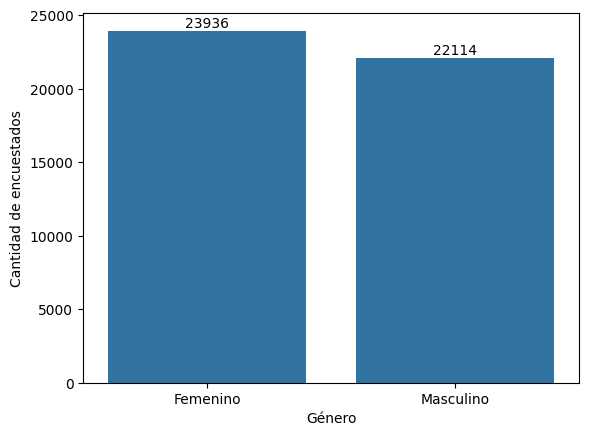

In [80]:
ax = sns.barplot(data = df_genero_con_nombres.value_counts())

ax.set(xlabel='Género', ylabel = 'Cantidad de encuestados')
# Agregar etiquetas con los valores reales
for container in ax.containers:
    ax.bar_label(container)

plt.show()

4.Realicen una matriz de correlación para 2004 y 2024 con las siguientes
variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO,
CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este
link o este link para graficar la matriz de correlación. Comenten los
resultados.


In [81]:
correlation_matrix = df8.corr(numeric_only=True)
df_filtrado = df8.dropna()
df_filtrado = df_filtrado[(df_filtrado >= 0).all(axis=1)]

In [82]:
print(correlation_matrix)

            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE       H15  REGION  \
CODUSU         NaN   NaN        NaN        NaN         NaN       NaN     NaN   
ANO4           NaN   NaN        NaN        NaN         NaN       NaN     NaN   
TRIMESTRE      NaN   NaN        NaN        NaN         NaN       NaN     NaN   
NRO_HOGAR      NaN   NaN        NaN   1.000000   -0.053569 -0.333712     NaN   
COMPONENTE     NaN   NaN        NaN  -0.053569    1.000000 -0.685437     NaN   
...            ...   ...        ...        ...         ...       ...     ...   
PONDIH         NaN   NaN        NaN  -0.276644    0.047248 -0.207104     NaN   
PJ1_1          NaN   NaN        NaN        NaN         NaN       NaN     NaN   
PJ2_1          NaN   NaN        NaN        NaN         NaN       NaN     NaN   
PJ3_1          NaN   NaN        NaN        NaN         NaN       NaN     NaN   
IDIMPP         NaN   NaN        NaN        NaN         NaN       NaN     NaN   

            MAS_500  AGLOMERADO   PONDE

5. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál
es la media de ingreso per cápita familiar (IPCF) según estado
(ocupado, desocupado, inactivo)?

6. Uno de los grandes problemas de la EPH es la creciente cantidad de
hogares que no reportan sus ingresos (ver por ejemplo el siguiente
informe). ¿Cuántas personas no respondieron cuál es su condición de
actividad? Guarden como una base distinta llamada respondieron
las observaciones donde respondieron la pregunta sobre su condición
de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en
una base bajo el nombre norespondieron.

7. Agreguen a la base respondieron una columna llamada “PEA”
(Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la
composición por PEA para 2004 y 2024. Comenten los resultados.

8. Agreguen a la base respondieron una columna llamada “PET”
(Población en Edad para Trabajar) que tome 1 si están la persona tiene
entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando
la composición por PEA para 2004 y 2024. Comenten los resultados y
comparen PET con PEA.

9. Agreguen a la base respondieron una columna llamada “desocupado”
que tome 1 si la persona está desocupada. ¿Cuántas personas están
desocupadas en 2004 vs 2024?


a. Muestre la proporción de desocupados por nivel educativo
comparando 2004 vs 2024. ¿Hubo cambios de desocupados por
nivel educativo?

b. Cree una variable categórica de años cumplidos (CH06)
agrupada de a 10 años. Muestre proporción de desocupados por
edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de
desocupados por edad?


c. Seleccione una (1) variable de interés y muestre las diferencias
2004 vs 2024. ¿Hubo cambios de desocupados por edad?